
- InsightFace(InsightFace is an open source 2D&3D deep face analysis toolbox, mainly based on PyTorch and MXNet)entered to the facial recognition world with two spectacular modules: its face recognition model ArcFace, and its face detection model RetinaFace.

- The both models are state-of-the-art ones already.

- InsightFace efficiently implements a rich variety of state of the art algorithms of face recognition, face detection and face alignment, which optimized for both training and deployment.

A modern face recognition pipeline consists of 4 common stages: 

- detect, 
- align, 
- represent 
- verify. 

Detection and alignment are early and very important stages. RetinaFace handles those early stages with a high confidence score.

RetinaFace is mainly based on an academic study: 

- RetinaFace: Single-stage Dense Face Localisation in the Wild. 

Model design is based on feature pyramids. Context modules come after the independent context modules.

In [1]:
!pip install retina-face

In [2]:
from retinaface import RetinaFace

In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

# **Single Person Face detection**


In [8]:
img_path = "img3.jpg"

In [9]:
faces = RetinaFace.detect_faces(img_path)

# Face Alignment

Notice that found landmarks include eye coordinates. So, we can apply alignment to the detected faces until the eye coordinates become horizontal. Experiments show that alignment increases the face recognition accuracy almost 1%. RetinaFace framework offers a custom extract faces function. It expects exacth image path or numpy array, and it returns the detected face itself. It will apply alignment by default but you can turn this feature off if you set the align argument to False.

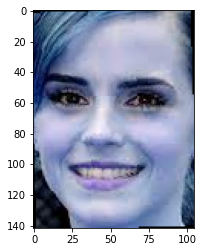

In [10]:

faces = RetinaFace.extract_faces(img_path = "img3.jpg", align = True)
for face in faces:
    plt.imshow(face)
    plt.show()

**Group of People**

# Face detection

In [11]:
img_path = "img.jpg"
#library serves with detect face function in its interface. 
#The function expects an exact image path. 
#Passing images in numpy format is fine as well.

In [12]:
img = cv2.imread(img_path)

In [13]:
obj = RetinaFace.detect_faces(img_path, threshold = 0.5)

In [14]:
obj

# the function will return facial area coordinates, 
# some landmarks including eye, nose and mouth coordinates with a confidence score

{'face_1': {'score': 0.9995668530464172,
  'facial_area': [71, 35, 82, 47],
  'landmarks': {'right_eye': [74.33352, 40.844498],
   'left_eye': [78.60244, 39.84175],
   'nose': [76.77262, 42.878468],
   'mouth_right': [75.80227, 45.076305],
   'mouth_left': [79.18946, 44.271557]}},
 'face_2': {'score': 0.9992156028747559,
  'facial_area': [107, 29, 117, 41],
  'landmarks': {'right_eye': [111.54354, 33.909477],
   'left_eye': [115.81033, 34.249893],
   'nose': [114.08618, 35.979397],
   'mouth_right': [111.74496, 38.20492],
   'mouth_left': [115.30889, 38.491173]}},
 'face_3': {'score': 0.9991621971130371,
  'facial_area': [126, 40, 136, 53],
  'landmarks': {'right_eye': [129.63249, 44.80594],
   'left_eye': [134.32349, 44.92932],
   'nose': [131.94452, 47.642513],
   'mouth_right': [129.84898, 49.637497],
   'mouth_left': [133.78487, 49.749496]}},
 'face_4': {'score': 0.9990050196647644,
  'facial_area': [92, 42, 101, 54],
  'landmarks': {'right_eye': [94.73275, 46.9692],
   'left_eye':

In [15]:
obj.keys()

dict_keys(['face_1', 'face_2', 'face_3', 'face_4', 'face_5', 'face_6', 'face_7', 'face_8', 'face_9', 'face_10', 'face_11', 'face_12', 'face_13', 'face_14', 'face_15', 'face_16', 'face_17', 'face_18', 'face_19', 'face_20', 'face_21', 'face_22', 'face_23', 'face_24', 'face_25', 'face_26', 'face_27', 'face_28', 'face_29', 'face_30', 'face_31', 'face_32', 'face_33', 'face_34', 'face_35'])

In [16]:
len(obj.keys())

35

In [17]:
for key in obj.keys():
    identity = obj[key]
    print(identity)
    
    facial_area = identity["facial_area"]
    
    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 1)
    

{'score': 0.9995668530464172, 'facial_area': [71, 35, 82, 47], 'landmarks': {'right_eye': [74.33352, 40.844498], 'left_eye': [78.60244, 39.84175], 'nose': [76.77262, 42.878468], 'mouth_right': [75.80227, 45.076305], 'mouth_left': [79.18946, 44.271557]}}
{'score': 0.9992156028747559, 'facial_area': [107, 29, 117, 41], 'landmarks': {'right_eye': [111.54354, 33.909477], 'left_eye': [115.81033, 34.249893], 'nose': [114.08618, 35.979397], 'mouth_right': [111.74496, 38.20492], 'mouth_left': [115.30889, 38.491173]}}
{'score': 0.9991621971130371, 'facial_area': [126, 40, 136, 53], 'landmarks': {'right_eye': [129.63249, 44.80594], 'left_eye': [134.32349, 44.92932], 'nose': [131.94452, 47.642513], 'mouth_right': [129.84898, 49.637497], 'mouth_left': [133.78487, 49.749496]}}
{'score': 0.9990050196647644, 'facial_area': [92, 42, 101, 54], 'landmarks': {'right_eye': [94.73275, 46.9692], 'left_eye': [98.97317, 46.56164], 'nose': [97.097984, 48.997597], 'mouth_right': [95.47172, 51.452793], 'mouth_le

In [18]:
obj

{'face_1': {'score': 0.9995668530464172,
  'facial_area': [71, 35, 82, 47],
  'landmarks': {'right_eye': [74.33352, 40.844498],
   'left_eye': [78.60244, 39.84175],
   'nose': [76.77262, 42.878468],
   'mouth_right': [75.80227, 45.076305],
   'mouth_left': [79.18946, 44.271557]}},
 'face_2': {'score': 0.9992156028747559,
  'facial_area': [107, 29, 117, 41],
  'landmarks': {'right_eye': [111.54354, 33.909477],
   'left_eye': [115.81033, 34.249893],
   'nose': [114.08618, 35.979397],
   'mouth_right': [111.74496, 38.20492],
   'mouth_left': [115.30889, 38.491173]}},
 'face_3': {'score': 0.9991621971130371,
  'facial_area': [126, 40, 136, 53],
  'landmarks': {'right_eye': [129.63249, 44.80594],
   'left_eye': [134.32349, 44.92932],
   'nose': [131.94452, 47.642513],
   'mouth_right': [129.84898, 49.637497],
   'mouth_left': [133.78487, 49.749496]}},
 'face_4': {'score': 0.9990050196647644,
  'facial_area': [92, 42, 101, 54],
  'landmarks': {'right_eye': [94.73275, 46.9692],
   'left_eye':

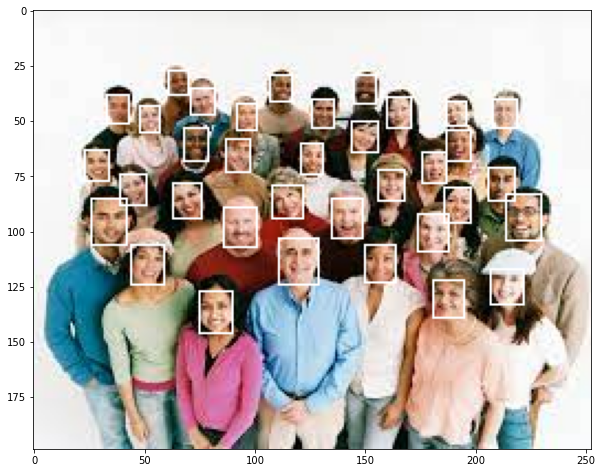

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])
plt.show()

# Face Recognition

In [ ]:
!pip install deepface

In [20]:
from deepface import DeepFace

Face recognition module of insightface is ArcFace and face detection module is RetinaFace.

In [22]:
obj = DeepFace.verify("img3.jpg", "img2.jpg", model_name = 'ArcFace', detector_backend = 'retinaface')
print(obj)

{'verified': False, 'distance': 0.901396586253859, 'max_threshold_to_verify': 0.6871912959056619, 'model': 'ArcFace', 'similarity_metric': 'cosine'}


In [23]:
obj

{'verified': False,
 'distance': 0.901396586253859,
 'max_threshold_to_verify': 0.6871912959056619,
 'model': 'ArcFace',
 'similarity_metric': 'cosine'}



Retinaface is wrapped in deepface directly. The library also wraps other state-of-the-art face detectors: opencv, ssd, dlib and mtcnn. Here, retinaface , dlib and mtcnn find facial landmarks including eye coordinates. That’s why, their detection + alignment score is high. On the other hand, opencv and ssd are faster in detection but their alignment score is low. If your priority is confidence, then consider to use mtcnn, retinaface or dlib; on the other hand, if your priority is speed, consider to use opencv or ssd.